# (sFigure14)-Infiltration Characteristics of CD8+ MAIT Cells in Gastric Mucosal with H. pylori Infection.

In [2]:
import anndata as ad
import scanpy as sc
import omicverse as ov


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
Mait = adata_CD8[adata_CD8.obs['Subcelltype']=='CD8.MAIT']
Mait.uns['Sample_colors'] = adata_CD8.uns['Sample_colors']
Mait

AnnData object with n_obs × n_vars = 563 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
Mait = adata_CD8[adata_CD8.obs['Subcelltype']=='CD8.MAIT']
sc.pp.neighbors(Mait, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(Mait)
sc.tl.paga(Mait)
sc.pl.paga(Mait, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(Mait,init_pos='paga')

computing neighbors


2024-04-17 18:39:42.013296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 18:39:49.219044: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 18:40:08.087452: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:04)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


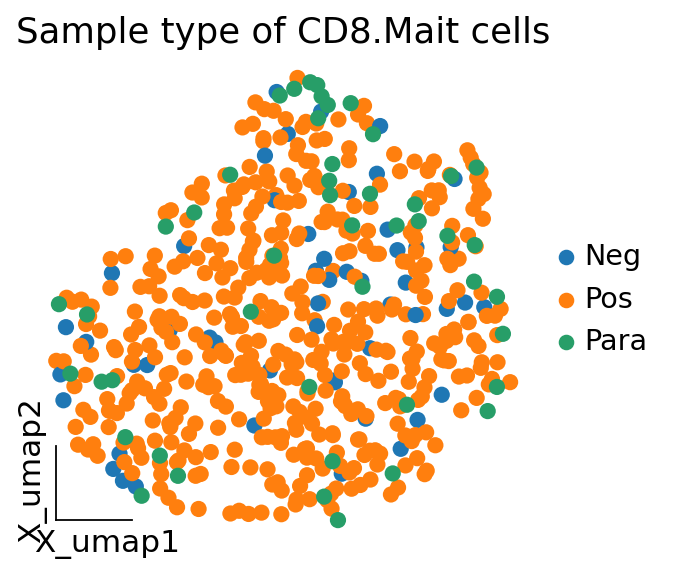

In [7]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))
axes = ov.utils.embedding(Mait,
                basis='X_umap',
                color=['Sample'],
                title='Sample type',
                frameon='small',
                cmap='RdBu_r',
                show=False,
                ax=ax)
axes.set_title('Sample type of CD8.Mait cells',fontdict={'size':16})

plt.savefig("Gastric/Figure/sFigure14/sFigure14_A.png",dpi=300,bbox_inches = 'tight')

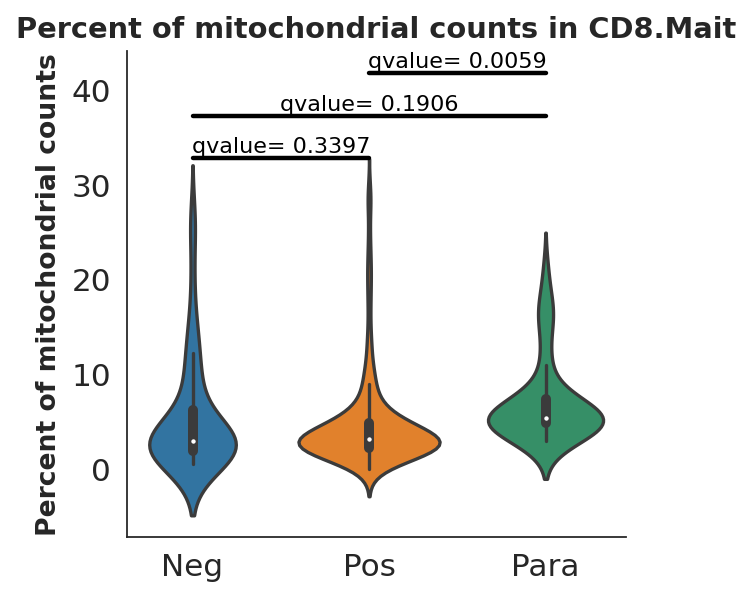

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
sns.set_style('white')

sample_data = Mait
plt.figure(figsize=(4, 4))

ax = sns.violinplot(data=sample_data.obs,
                    x="Sample", y="pct_counts_mt", palette=sample_data.uns['Sample_colors']).axes

ax.set_xlabel('')

sns.despine()

group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs['pct_counts_mt']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs['pct_counts_mt']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs['pct_counts_mt']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]


def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.1, p_value_str, ha='center', va='bottom', color='black',fontsize=10)

add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.1)
add_stat_annotation(ax, [0, 2], adjusted_p_values[1], offset=0.25)
add_stat_annotation(ax, [1, 2], adjusted_p_values[2], offset=0.4)


plt.ylabel("Percent of mitochondrial counts",fontsize=12,fontweight='bold')

ax.set_xlabel('')
ax.set_title("Percent of mitochondrial counts in CD8.Mait", fontsize=13,fontweight='bold')

sns.despine()
plt.savefig('Gastric/Figure/sFigure14/sFigure14_B.png', dpi=300)

plt.show()


computing score 'Exhausted score'
    finished: added
    'Exhausted score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


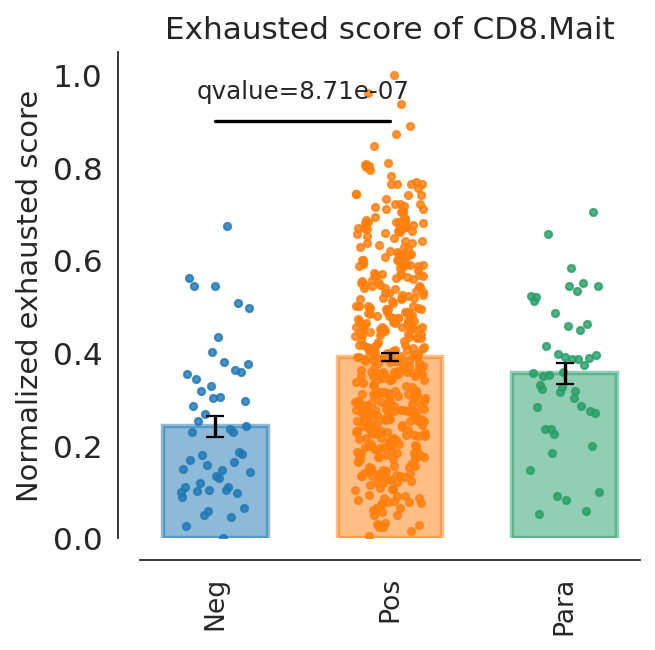

In [21]:
Dysfunction = ['TIGIT','CTLA4','PDCD1','LAYN','LAG3','CD244','CD160','HAVCR2']
sc.tl.score_genes(Mait, Dysfunction, score_name='Exhausted score')
fig, ax = plt.subplots(figsize=(4,4))
column = 'Exhausted score'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color='Exhausted score_normalized',figsize=(3,4),
           ax=ax,
           ylabel='Normalized exhausted score',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Exhausted score of CD8.Mait',fontsize=14)


group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs['Exhausted score_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs['Exhausted score_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs['Exhausted score_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[0])


ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=0.9,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/sFigure14/sFigure14_C_1.png', dpi=300,bbox_inches = 'tight')

computing score 'Cytotoxicity score'
    finished: added
    'Cytotoxicity score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


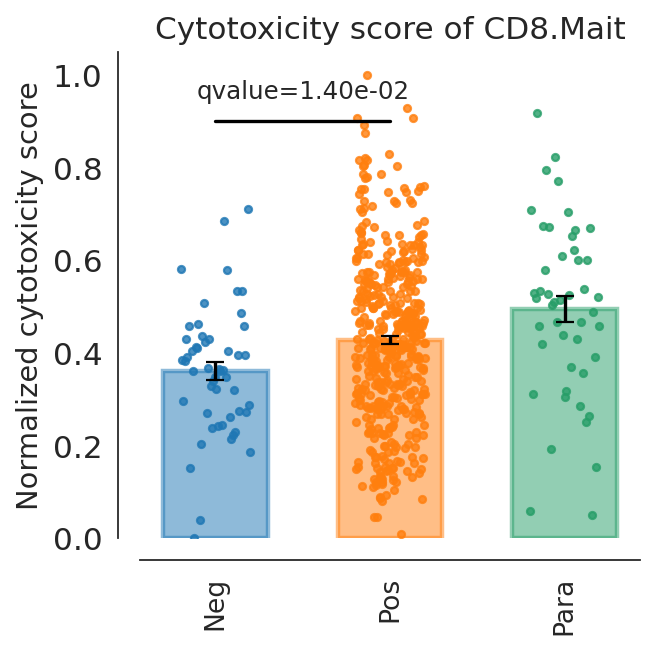

In [20]:
Cytotoxicity = ['RPF1','CD44','IFNG','TNF','GZMM','GZMK','GZMB','GZMH','FASLG','GZMA','NKG7']
sc.tl.score_genes(Mait, Cytotoxicity, score_name='Cytotoxicity score')
fig, ax = plt.subplots(figsize=(4,4))
column = 'Cytotoxicity score'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color='Cytotoxicity score_normalized',figsize=(3,4),
           ax=ax,
           ylabel='Normalized cytotoxicity score',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Cytotoxicity score of CD8.Mait',fontsize=14)


group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs['Cytotoxicity score_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs['Cytotoxicity score_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs['Cytotoxicity score_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[0])


ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=0.9,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/sFigure14/sFigure14_C_2.png', dpi=300,bbox_inches = 'tight')

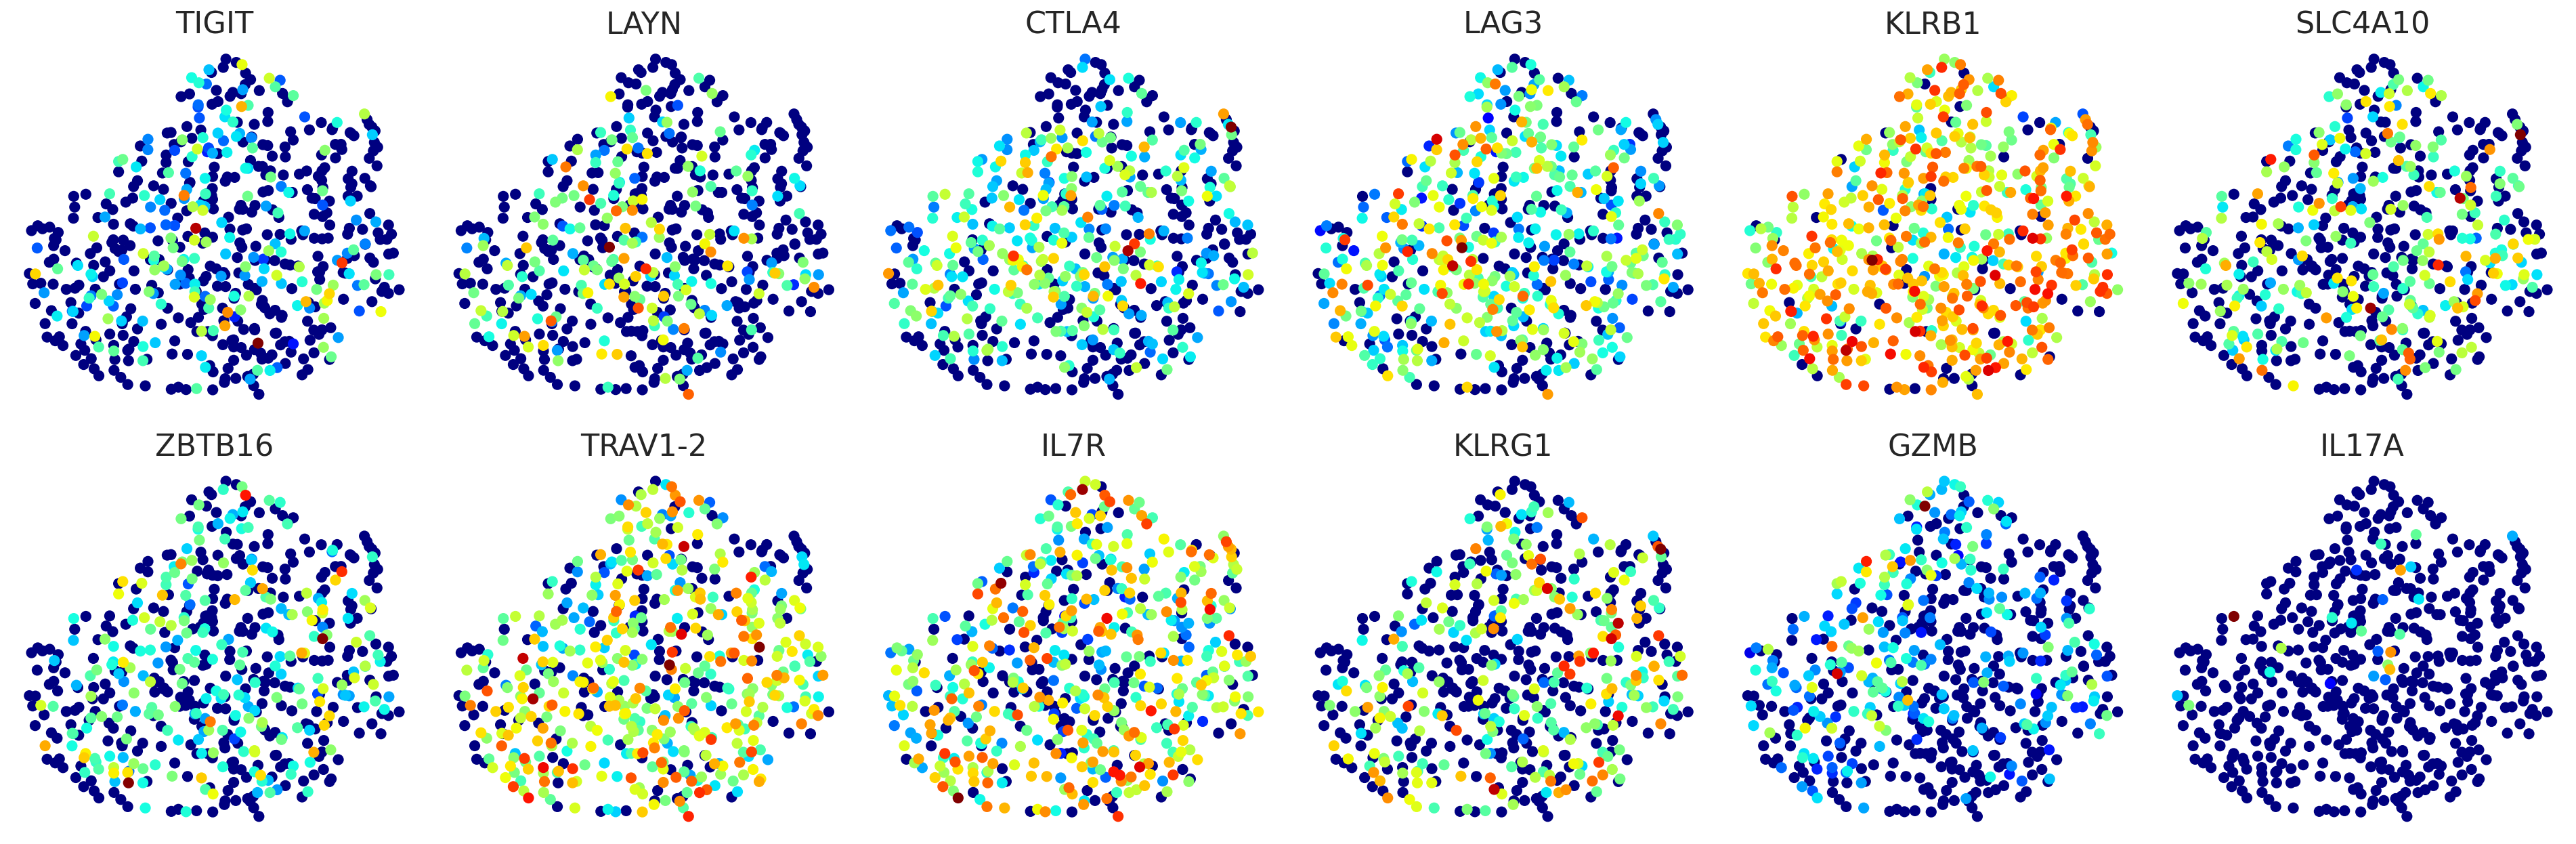

In [67]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(24, 8), sharex=True, sharey=True)
all_genes = ['TIGIT','LAYN', 'CTLA4','LAG3','KLRB1','SLC4A10','ZBTB16','TRAV1-2','IL7R','KLRG1','GZMB','IL17A']

for i, row_axes in enumerate(axes):
    for j, ax in enumerate(row_axes):    
        axes = ov.utils.embedding(Mait,
                               basis='X_umap',
                               color=all_genes[i*6+j],
                               title=all_genes[i*6+j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               color_map = 'jet',
                               colorbar_loc=None,
                               legend_fontsize=18,
                               ax=ax)
        axes.set_title(all_genes[i*6+j],fontdict={'size':20})


plt.tight_layout()

plt.savefig('Gastric/Figure/sFigure14/sFigure14_D.png', dpi=300)
plt.show()


In [11]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
CD8_Mait = adata_raw[Mait.obs.index]
CD8_Mait.obs = Mait.obs
CD8_Mait.uns = Mait.uns
CD8_Mait.obsm = Mait.obsm
CD8_Mait

AnnData object with n_obs × n_vars = 563 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Exhausted score', 'Exhausted score_normalized', 'Cytotoxicity score', 'Cytotoxicity score_normalized'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [12]:
#normalize and high variable genes (HVGs) calculated
CD8_Mait = CD8_Mait[:,~CD8_Mait.var_names.str.contains('RPS')]
CD8_Mait = CD8_Mait[:,~CD8_Mait.var_names.str.contains('RPL')]
CD8_Mait=ov.pp.preprocess(CD8_Mait,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
CD8_Mait.raw = CD8_Mait
CD8_Mait = CD8_Mait[:, CD8_Mait.var.highly_variable_features]

CD8_Mait.layers['lognorm'] = CD8_Mait.X
CD8_Mait

Begin robust gene identification
After filtration, 17132/32115 genes are kept. Among 17132 genes, 17132 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 563 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Exhausted score', 'Exhausted score_normalized', 'Cytotoxicity score', 'Cytotoxicity score_normalized'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

In [14]:
dds=ov.bulk.pyDEG(CD8_Mait.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=CD8_Mait[CD8_Mait.obs['Sample']!='Neg'].obs.index.tolist()
control_groups=CD8_Mait[CD8_Mait.obs['Sample']=='Neg'].obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=0,
                   pval_threshold=0.05,
                   logp_max=20)
dds.result.loc[dds.result.loc[:,'log2FC']<-4,'log2FC']=-4
dds.result.loc[dds.result.loc[:,'log2FC']>4,'log2FC']=4

... drop_duplicates_index success
... Fold change threshold: 0


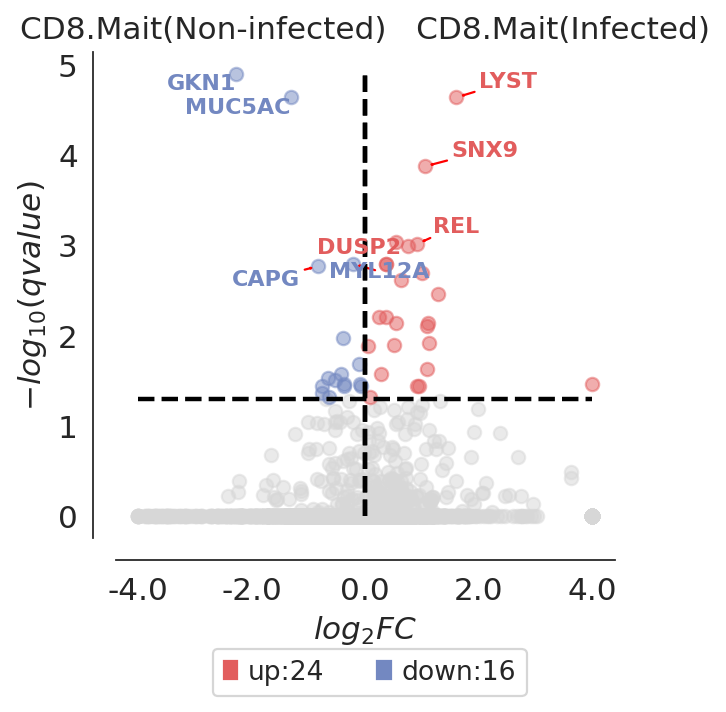

In [19]:
ax = dds.plot_volcano(title='CD8.Mait(Non-infected)   CD8.Mait(Infected)',figsize=(4,4),
                 plot_genes_num=8,plot_genes_fontsize=10,legend_bbox=(0.85, -0.2),)#plot_genes=['GZMK','CTLA4','GNLY'])
plt.savefig('Gastric/Figure/sFigure14/sFigure14_E_1.png',dpi=300,bbox_inches = 'tight')

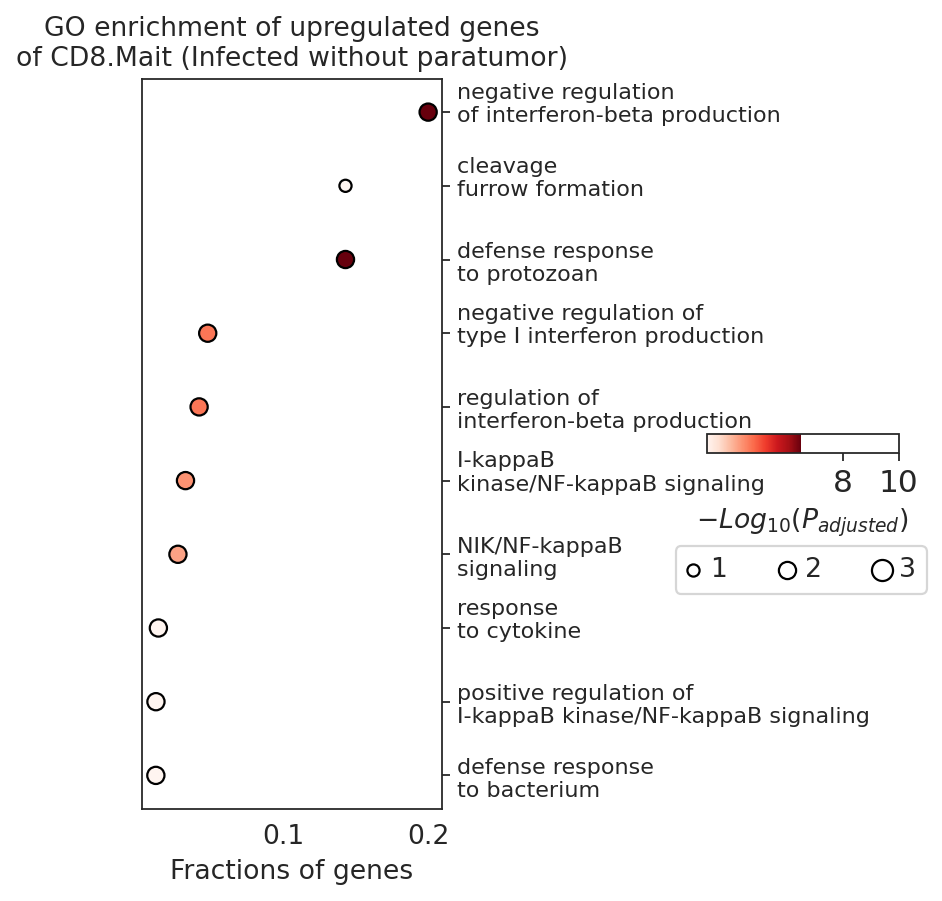

In [117]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2.4,6),fig_title='GO enrichment of upregulated genes\nof CD8.Mait (Infected without paratumor)',
                          node_size=[1, 2, 3],
                          cax_loc=[1.65, 0.52, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.23, -8),node_diameter=30,custom_ticks=[8,10],
                        cmap='Reds')
#plt.savefig('Gastric/Figure/sFigure7/sFigure7_E_2',dpi=300,bbox_inches = 'tight')

In [131]:
def insert_newlines(s, n=60):

    if len(s) <= n:
        return s

    parts = s.split(' ')
    new_s = parts[0]
    for part in parts[1:]:
        if len(new_s) - new_s.rfind('\n') + len(part) + 1 > n:
            new_s += '\n' + part
        else:
            new_s += ' ' + part
    return new_s


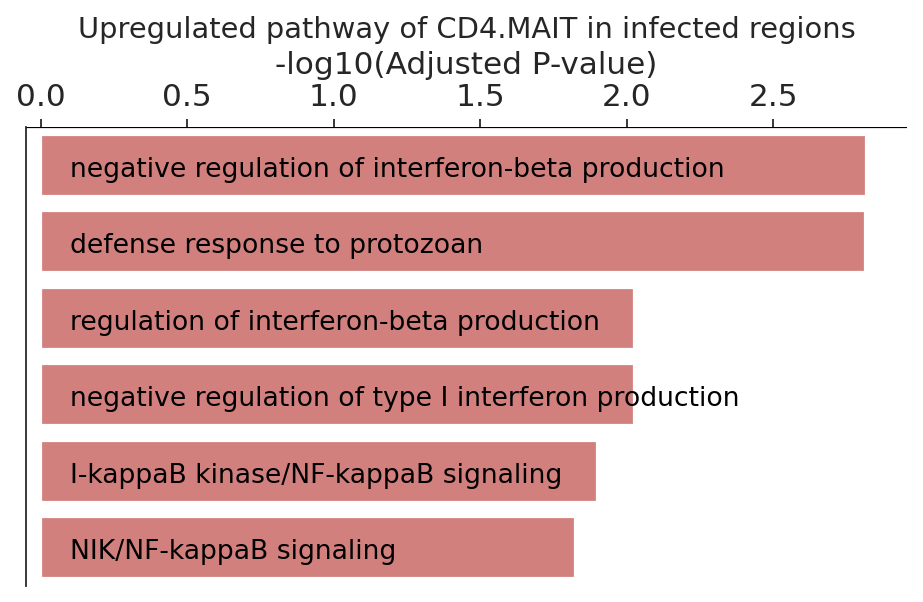

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr = enr.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_used = enr.iloc[:6,:]
sns.set_style('white')





enr_used['Term'] = enr_used['Term'].str.replace('\(GO:\d+\)', '', regex=True)

enr_used['-log10(Adjusted P-value)'] = -np.log10(enr_used['Adjusted P-value'])
enr_sorted = enr_used.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_sorted['Term'] = enr_sorted['Term'].apply(insert_newlines)


f, ax = plt.subplots(1, 1, figsize=(6,4), sharex=True)  
colors = [ov.pl.red_color[1]]*len(enr.index)  
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', fontsize=12,
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  
ax.set_title('Upregulated pathway of CD4.MAIT in infected regions', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig('Gastric/Figure/sFigure14/sFigure14_E_2.png',dpi=300,bbox_inches = 'tight')
plt.show()

computing score 'defense response to bacterium (GO:0042742) score'
    finished: added
    'defense response to bacterium (GO:0042742) score', score of gene set (adata.obs).
    696 total control genes are used. (0:00:00)


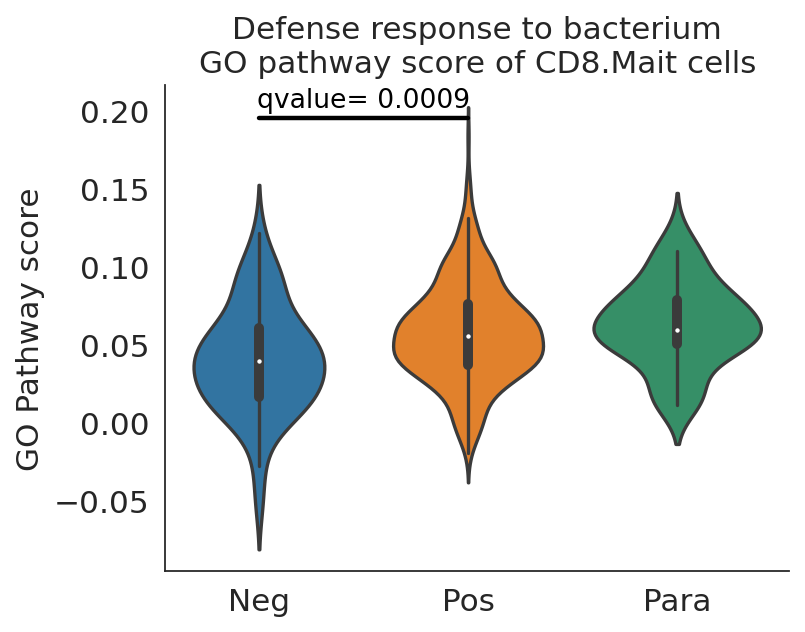

In [32]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'defense response to bacterium (GO:0042742)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)


add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.05)

ax.set_title('Defense response to bacterium'+'\nGO pathway score of CD8.Mait cells',fontsize=14)


#add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0.05)
plt.savefig('Gastric/Figure/sFigure14/sFigure14_F_1.png',dpi=300,bbox_inches = 'tight')


computing score 'defense response to Gram-negative bacterium (GO:0050829) score'
    finished: added
    'defense response to Gram-negative bacterium (GO:0050829) score', score of gene set (adata.obs).
    648 total control genes are used. (0:00:00)


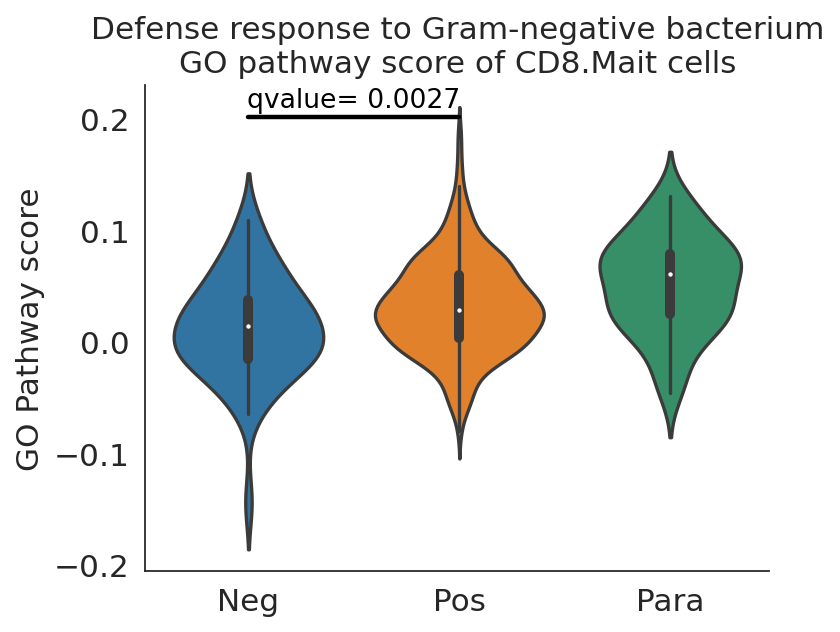

In [33]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'defense response to Gram-negative bacterium (GO:0050829)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)


add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.05)

ax.set_title('Defense response to Gram-negative bacterium'+'\nGO pathway score of CD8.Mait cells',fontsize=14)

plt.savefig('Gastric/Figure/sFigure14/sFigure14_F_2.png',dpi=300,bbox_inches = 'tight')

computing score 'defense response to Gram-positive bacterium (GO:0050830) score'
    finished: added
    'defense response to Gram-positive bacterium (GO:0050830) score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)


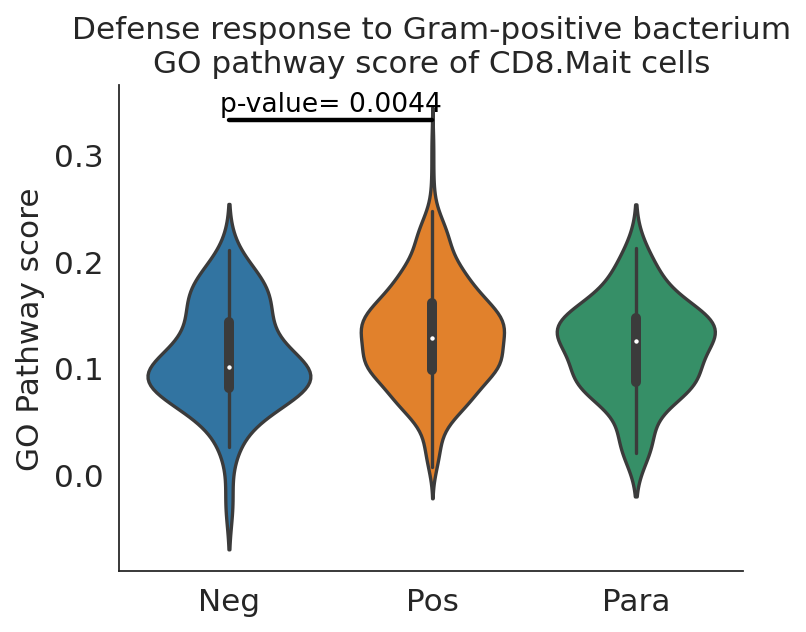

In [90]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'defense response to Gram-positive bacterium (GO:0050830)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name='defense response to Gram-positive bacterium (GO:0050830) score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y="defense response to Gram-positive bacterium (GO:0050830) score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'p-value= {p_value:.2e}' if p_value < 0.0001 else f'p-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)

ax.set_title('Defense response to Gram-positive bacterium'+'\nGO pathway score of CD8.Mait cells',fontsize=14)


add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0.05)
#plt.savefig('Gastric/Figure/sFigure7/sFigure7_G_3',dpi=300,bbox_inches = 'tight')

computing score 'defense response to protozoan (GO:0042832) score'
    finished: added
    'defense response to protozoan (GO:0042832) score', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)


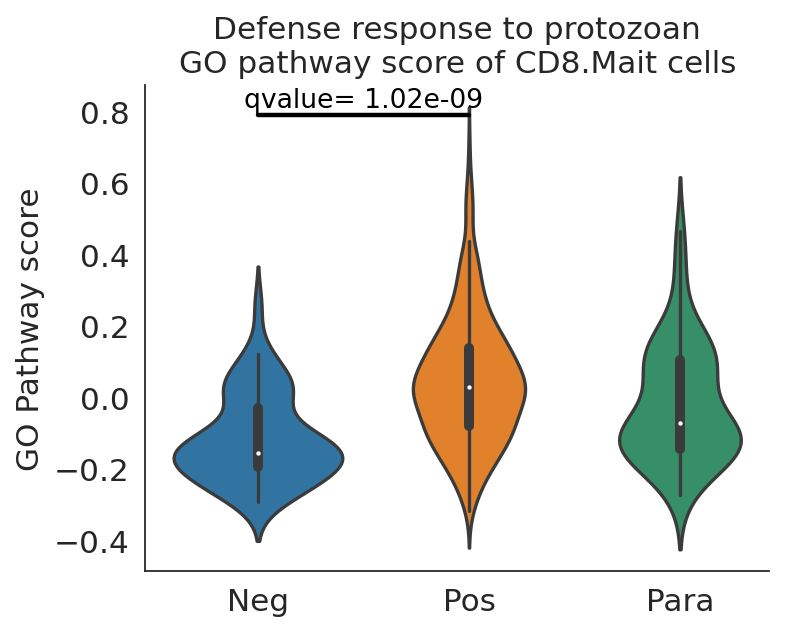

In [40]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'defense response to protozoan (GO:0042832)'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name='defense response to protozoan (GO:0042832) score')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y="defense response to protozoan (GO:0042832) score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('GO Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)


add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.08)

ax.set_title('Defense response to protozoan'+'\nGO pathway score of CD8.Mait cells',fontsize=14)

plt.savefig('Gastric/Figure/sFigure14/sFigure14_F_3.png',dpi=300,bbox_inches = 'tight')


computing score 'Cytokine-cytokine receptor interaction score'
    finished: added
    'Cytokine-cytokine receptor interaction score', score of gene set (adata.obs).
    692 total control genes are used. (0:00:00)


Text(0.5, 1.0, 'Cytokine-cytokine receptor interaction\n KEGG pathway score of CD8.Mait cells')

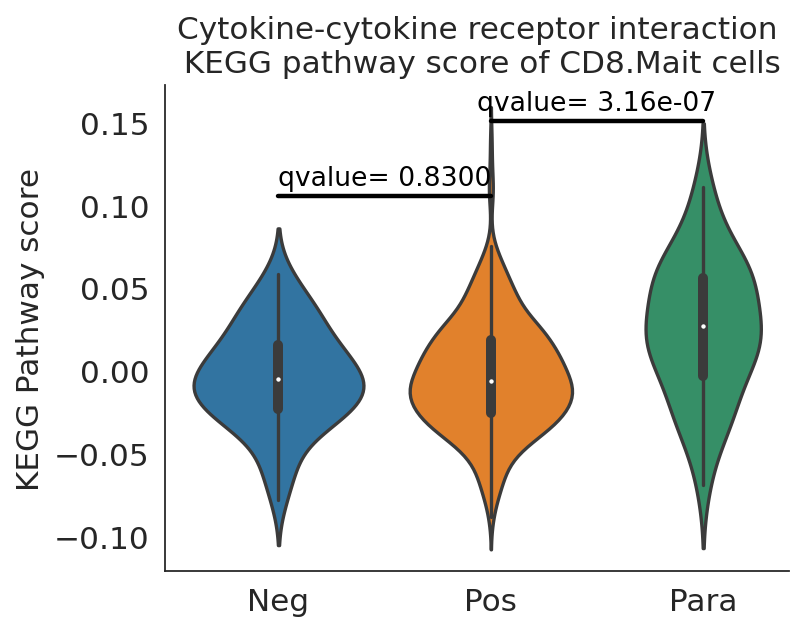

In [46]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')##Assest all pathways
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'Cytokine-cytokine receptor interaction'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')


plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('KEGG Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)


add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=-0.15)
add_stat_annotation(ax, [1, 2], adjusted_p_values[2], offset=0.05)

ax.set_title('Cytokine-cytokine receptor interaction'+'\n KEGG pathway score of CD8.Mait cells',fontsize=14)


#add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=-0.15)
#add_stat_annotation(ax, [1, 2], p_value_pos_para, offset=0.05)
#plt.savefig('Gastric/Figure/sFigure7/sFigure7_G_5',dpi=300,bbox_inches = 'tight')

computing score 'JAK-STAT signaling pathway score'
    finished: added
    'JAK-STAT signaling pathway score', score of gene set (adata.obs).
    697 total control genes are used. (0:00:00)


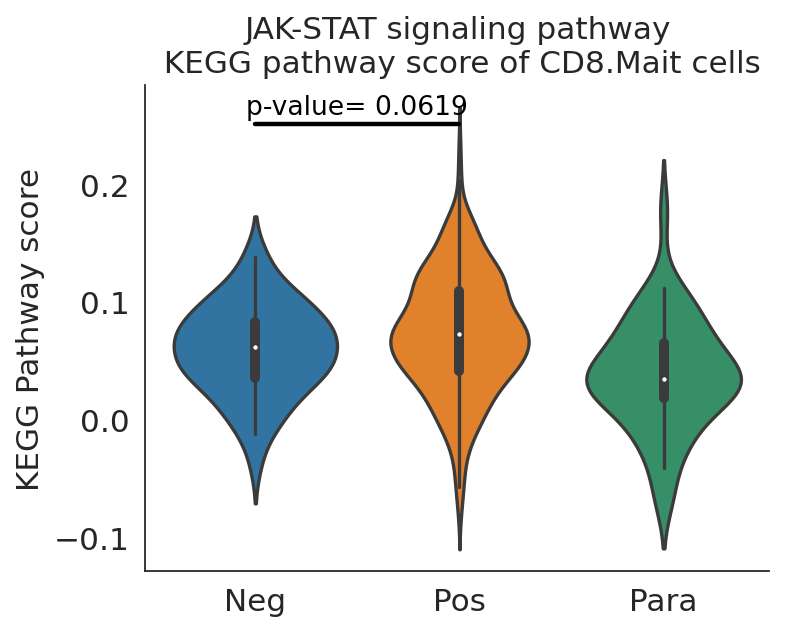

In [93]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')##Assest all pathways
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'JAK-STAT signaling pathway'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')


plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('KEGG Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'p-value= {p_value:.2e}' if p_value < 0.0001 else f'p-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)

ax.set_title('JAK-STAT signaling pathway'+'\n KEGG pathway score of CD8.Mait cells',fontsize=14)


add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0.05)
#plt.savefig('Gastric/Figure/sFigure7/sFigure7_G_6',dpi=300,bbox_inches = 'tight')

computing score 'Hypertrophic cardiomyopathy score'
    finished: added
    'Hypertrophic cardiomyopathy score', score of gene set (adata.obs).
    596 total control genes are used. (0:00:00)


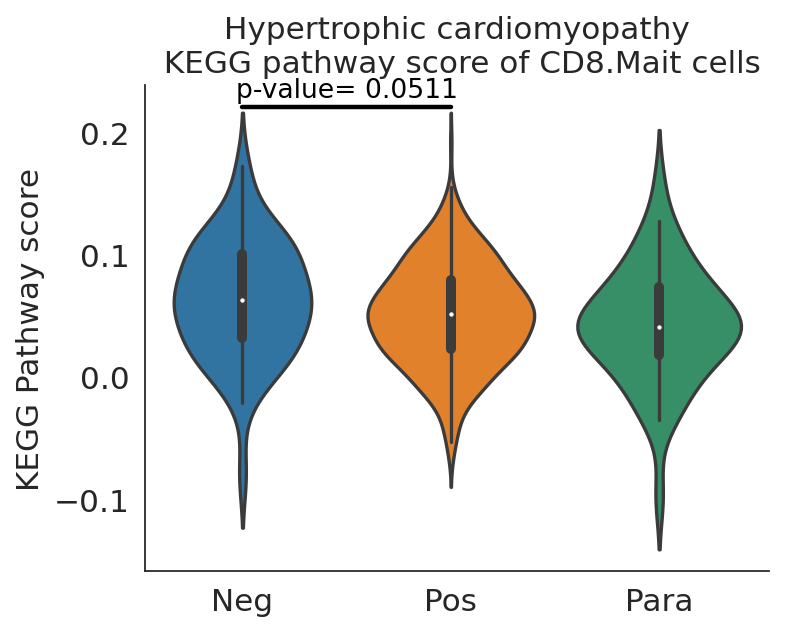

In [94]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')##Assest all pathways
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'Hypertrophic cardiomyopathy'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')


plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('KEGG Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'p-value= {p_value:.2e}' if p_value < 0.0001 else f'p-value= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)

ax.set_title('Hypertrophic cardiomyopathy'+'\n KEGG pathway score of CD8.Mait cells',fontsize=14)


add_stat_annotation(ax, [0, 1], p_value_neg_pos, offset=0.1)
#plt.savefig('Gastric/Figure/sFigure7/sFigure7_G_7',dpi=300,bbox_inches = 'tight')

computing score 'Leukocyte transendothelial migration score'
    finished: added
    'Leukocyte transendothelial migration score', score of gene set (adata.obs).
    695 total control genes are used. (0:00:00)


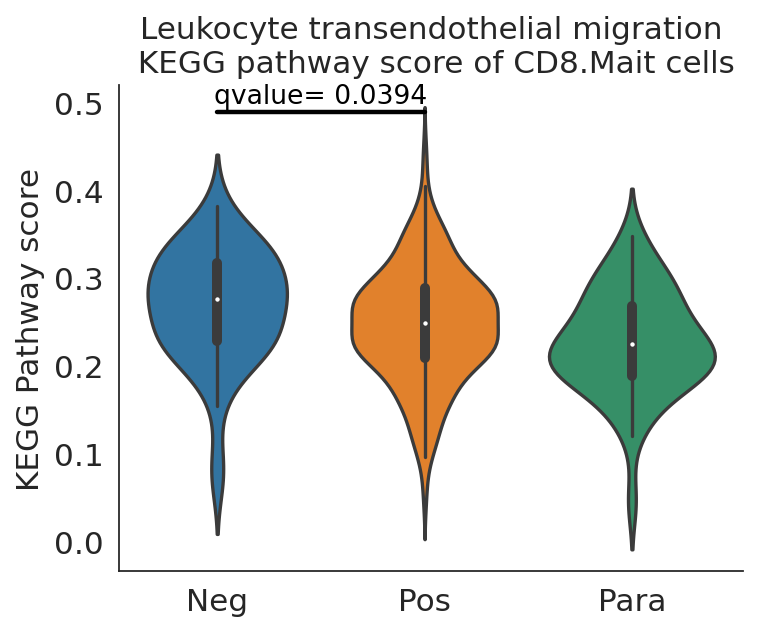

In [47]:
from scipy.stats import ttest_ind
import seaborn as sns
sns.set_style('white')
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')##Assest all pathways
##Assest all pathways
Mait_raw = Mait.raw.to_adata()

pathway_name = 'Leukocyte transendothelial migration'
pathway_gene = pathway_dict[pathway_name]
sc.tl.score_genes(Mait_raw, pathway_gene, score_name=pathway_name+' score')


plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=Mait_raw.obs,
                    x="Sample", y=pathway_name+" score", palette=Mait_raw.uns['Sample_colors']).axes


ax.set_xlabel('')
ax.set_ylabel('KEGG Pathway score')

sns.despine()



sample_data = Mait_raw
group_neg = sample_data[sample_data.obs['Sample'] == 'Neg'].obs[pathway_name+' score']
group_pos = sample_data[sample_data.obs['Sample'] == 'Pos'].obs[pathway_name+' score']
group_para = sample_data[sample_data.obs['Sample'] == 'Para'].obs[pathway_name+' score']


t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)


p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]



def add_stat_annotation(ax, x_pos, p_value, offset):
    y_max = max(max(group_neg), max(group_pos), max(group_para))
    y_min = min(min(group_neg), min(group_pos), min(group_para))
    y_range = y_max - y_min
    y_text = y_max + offset * y_range

    ax.plot(x_pos, [y_text, y_text], lw=2, color='black')
    p_value_str = f'qvalue= {p_value:.2e}' if p_value < 0.0001 else f'qvalue= {p_value:.4f}'

    x_center = (x_pos[0] + x_pos[1]) / 2
    ax.text(x_center, y_text+0.003, p_value_str, ha='center', va='bottom', color='black',fontsize=12)


add_stat_annotation(ax, [0, 1], adjusted_p_values[0], offset=0.08)

ax.set_title('Leukocyte transendothelial migration'+'\n KEGG pathway score of CD8.Mait cells',fontsize=14)

plt.savefig('Gastric/Figure/sFigure14/sFigure14_F_4.png',dpi=300,bbox_inches = 'tight')
